In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cube = cv.imread('cube.png')
cube = cv.cvtColor(cube, cv.COLOR_BGR2GRAY)

In [3]:
Ox_projection = np.sum(cube, axis=0).astype(np.int32)
Oy_projection = np.sum(cube, axis=1).astype(np.int32)

In [4]:
def find_corners(values):
    return [
        i for i in range(1, len(values - 1))
        if (abs(values[i - 1] - values[i]) >= 5_000 and \
            abs(values[i] - values[i + 1]) >= 5_000)
    ]

x_corners = find_corners(Ox_projection)
y_corners = find_corners(Oy_projection)

corners = np.array([
    [x_corners[i // 2], y_corners[i % 2]]
    for i in range(4)
])

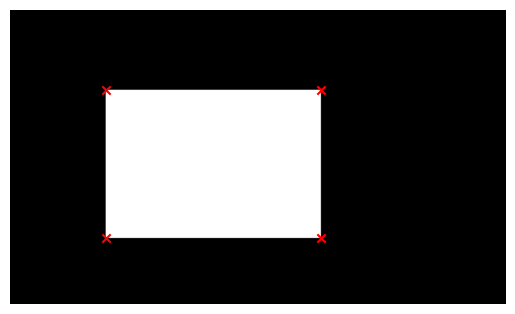

In [5]:
plt.imshow(cube, cmap='gray')
plt.scatter(corners[:, 0], corners[:, 1], marker='x', color='red')
plt.axis('off')
plt.show()